Here is where some great documentation will go.

In [23]:
import tensorflow as tf
from tensorflow import keras

import pickle
import gzip
file  = gzip.open("shapes.dat.gz", "rb")
shapes = pickle.load(file)

from numpy.random import permutation
perm = permutation(len(shapes['data']))

shapes['data']   = shapes['data'][perm]
shapes['target'] = shapes['target'][perm]

X,y = shapes["data"], shapes["target"]

def shapename(l):
    if l == 0:
        return "circle"
    elif l == 1:
        return "triangle"
    elif l == 2:
        return "rectangle"
    elif l == 3:
        return "square"


This is a square.


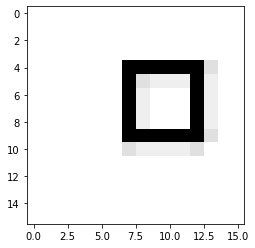

In [35]:
# This is superfluous and just an example of picking an image and displaying it.
import matplotlib.pyplot as plt
i = X[0].reshape(16,16)
plt.imshow(i, cmap='gray')
print("This is a %s." % shapename(y[0]))

In [36]:
trainIndex = int(len(X)*0.8) # 80% of the dataset used for training
X_train, X_test, y_train, y_test = X[:trainIndex], X[trainIndex:], y[:trainIndex], y[trainIndex:]

In [37]:
inputLayer  = keras.layers.Flatten()
hiddenLayer = keras.layers.Dense(256, activation=tf.nn.relu)
outputLayer = keras.layers.Dense(4,   activation=tf.nn.softmax)

model = keras.Sequential([inputLayer, hiddenLayer, outputLayer])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
2000/2000 [==============================] - 14s 7ms/step - loss: 0.8513 - accuracy: 0.6498
Epoch 2/5
2000/2000 [==============================] - 18s 9ms/step - loss: 0.2609 - accuracy: 0.9252
Epoch 3/5
1306/2000 [==================>...........] - ETA: 6s - loss: 0.1472 - accuracy: 0.9586

In [28]:
C = model.predict(X_test)

I think it is a square!
And you said it is a square.


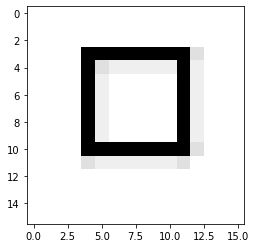

In [33]:
import numpy
i = 4055
plt.imshow(X_test[i].reshape(16,16), cmap='gray')
print("I think it is a %s!" % shapename(numpy.argmax(C[i])))
print("And you said it is a %s." % shapename(y_test[i]))